In [1]:
# 위키독스 - 딥 러닝을 이용한 자연어 처리 입문
# https://wikidocs.net/book/2155
# 2장 - 텍스트 전처리

# 영문 워드 클라우드

In [2]:
# !pip install nltk

  Using cached click-8.1.3-py3-none-any.whl (96 kB)


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
# NLTK(Natural Language ToolKit)
# 코랩에서는 접속할때마다 다운받아야함
# 주피터는 nltk 패키지 부터 다운하고 한번만 다운하면 됨

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
# !pip install wordcloud

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [7]:
from wordcloud import WordCloud, STOPWORDS # 주피터는 wordCloud 인것 같음
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

## 1. stopwords(불용어) 처리

In [8]:
# 의미를 갖지 않는 불용어 stopwords로 제외
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# wordCloud 에서 제공하는 불용어
sw_wc = STOPWORDS
print(sw_wc)

{"hadn't", 'who', 'would', 'doing', "he'll", 'between', 'you', 'does', 'from', 'this', 'themselves', 'own', 'yours', 'down', 'few', 'or', "i've", "hasn't", 'could', 'was', 'below', "you've", "she's", "you're", 'further', "i'd", 'him', 'ever', "they'll", 'should', "weren't", "you'd", 'being', "didn't", 'all', 'ought', "who's", 'k', 'itself', 'can', "let's", "we're", 'not', "there's", 'where', 'than', 'too', 'since', 'is', "they've", "can't", 'with', "isn't", "mustn't", 'get', 'also', 'it', 'on', 'before', 'ourselves', 'an', 'but', "couldn't", "she'd", 'com', 'then', 'to', 'i', 'both', "we'll", 'against', 'no', 'however', 'our', 'most', "won't", 'were', 'do', 'these', "i'll", 'during', 'by', 'each', 'her', 'theirs', 'therefore', 'so', "how's", 'my', "we've", 'just', "he's", 'up', 'his', 'out', 'here', 'me', 'shall', "aren't", 'they', 'we', "when's", 'hence', 'those', 'of', 'he', 'like', 'only', 'ours', "shouldn't", "where's", 'himself', 'r', "he'd", 'which', 'else', "she'll", 'such', "it

In [10]:
print(len(sw_nltk), len(sw_wc))

179 192


# 2. 이상한나라엘리스 분석

In [13]:
with open("data/Alice.txt") as file:
    text = file.read()

In [14]:
# 'said' 단어를 불용어 처리 추가
sw_wc.add('said') 

In [15]:
# 인스턴스 생성
wc = WordCloud(background_color = 'black',max_words = 2000, stopwords=sw_wc) # 옵션설정
wc = wc.generate(text) # 단어를 키로, 빈도수 비율을 밸류값인 딕셔너리로 바꿔주는 함수

In [17]:
count = 0
for key, value in wc.words_.items(): # words_ 워드 클라우드 메서드
    print(key, ':', value)
    count +=1
    if count > 10:
        break

Alice : 1.0
little : 0.29508196721311475
one : 0.27595628415300544
know : 0.2459016393442623
went : 0.226775956284153
thing : 0.2185792349726776
time : 0.2103825136612022
Queen : 0.20765027322404372
see : 0.1830601092896175
King : 0.17486338797814208
well : 0.1721311475409836


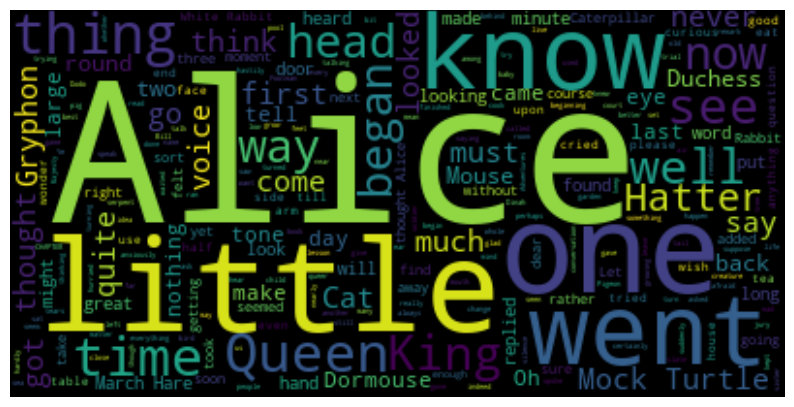

In [18]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # 축 끄기
plt.show()

### 딕셔너리 저장 방법

In [20]:
import pickle
data_dict = {}
data_dict['A'] = [0,1,2]
data_dict['B'] = [3,4,5]
data_dict['C'] = [6,7,8]

In [21]:
data_dict

{'A': [0, 1, 2], 'B': [3, 4, 5], 'C': [6, 7, 8]}

In [23]:
with open('data_dict.pkl', 'wb') as f : # 0과 1 형태로 넣어줌
    pickle.dump(data_dict, f)

In [24]:
print(f)

<_io.BufferedWriter name='data_dict.pkl'>


# 그림 위에 표시하기

In [27]:
mask = np.array(Image.open('./data/Alice_mask.png'))
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

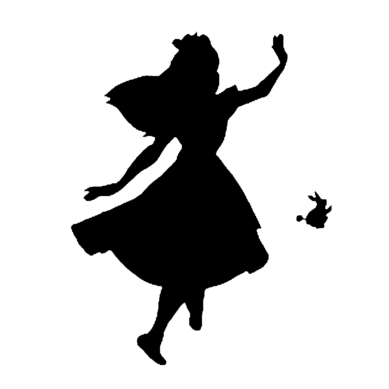

In [28]:
plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
wc = WordCloud(background_color = 'black',max_words = 2000, stopwords=sw_wc, mask=mask).generate(text)

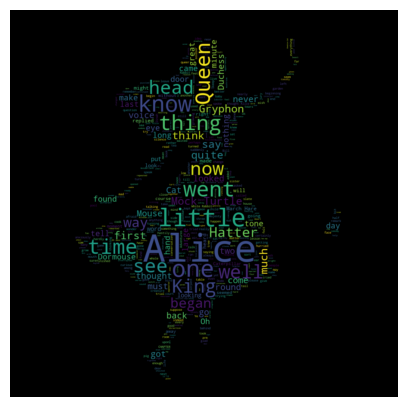

In [30]:
plt.figure(figsize = (5,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 한글 워드 클라우드 패키지

In [32]:
# 한국어 처리 할 수 있는 패키지 설치
# konlpy
# !pip install konlpy

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [33]:
from konlpy.tag import Okt, Kkma, Komoran

In [34]:
# 인스턴스 생성
okt = Okt()
kkma = Kkma()
kr = Komoran()

In [35]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'

In [36]:
# 한글 형태소 분석기별 차이점
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요', '.']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요', '.']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요', '.']


In [37]:
# 품사 태깅
# http://kkma.snu.ac.kr/documents/?doc=postag
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb'), ('.', 'Punctuation')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VXV'), ('세요', 'EFN'), ('.', 'SF')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EF'), ('.', 'SF')]


In [38]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


# Star Wars

In [1]:
from wordcloud import WordCloud, STOPWORDS # 주피터는 wordCloud 인것 같음
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from konlpy.tag import Okt, Kkma, Komoran

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [21]:
with open('./data/A_new_hope.txt') as file:
    text = file.read()

In [22]:
text = text.replace("HAN","Han").replace("LUKE'S","Luke")

In [23]:
# 의미를 갖지 않는 불용어 stopwords로 제외
sw_wc = STOPWORDS

In [24]:
sw_wc.add('int')
sw_wc.add('ext')
sw_wc.add('said')

In [25]:
mask = np.array(Image.open('./data/Stormtrooper_mask.png'))
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

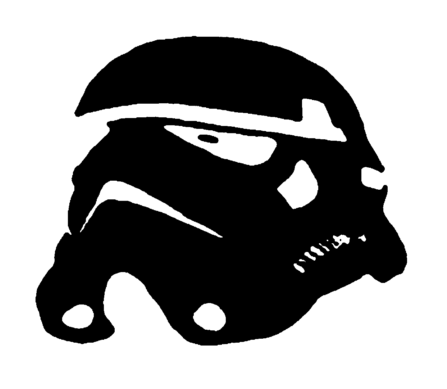

In [26]:
plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
wc = WordCloud(background_color = 'black',max_words = 2000, stopwords=sw_wc, mask=mask).generate(text)

In [28]:
for key, value in wc.words_.items(): # words_ 워드 클라우드 메서드
    print(key, ':', value)

Luke : 1.0
Han : 0.45121951219512196
DEATH STAR : 0.3902439024390244
THREEPIO : 0.36585365853658536
Ben : 0.2665505226480836
Leia : 0.19686411149825783
ship : 0.19686411149825783
Artoo : 0.17247386759581881
one : 0.1672473867595819
X WING : 0.16550522648083624
look : 0.1602787456445993
RED LEADER : 0.15505226480836237
back : 0.14285714285714285
move : 0.13588850174216027
two : 0.13414634146341464
toward : 0.1289198606271777
going : 0.12717770034843207
Biggs : 0.12020905923344948
TIE fighter : 0.11846689895470383
see : 0.11672473867595819
Vader : 0.11498257839721254
MILLENNIUM FALCON : 0.11149825783972125
SPACE : 0.10975609756097561
surface : 0.10801393728222997
right : 0.10801393728222997
Luke X : 0.10801393728222997
come : 0.10627177700348432
around : 0.10452961672473868
trooper : 0.10452961672473868
robot : 0.09930313588850175
small : 0.0975609756097561
side : 0.09581881533101046
head : 0.09581881533101046
make : 0.09059233449477352
now : 0.09059233449477352
WING FIGHTER : 0.09059233

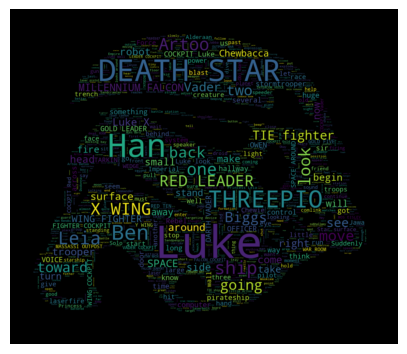

In [29]:
plt.figure(figsize = (5,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()